# Part I - (FordGoBike System Dataset Exploration)
## by (Jerome Gameli Kofi Davor)

## Introduction
> This data set contains information from the FordGoBike System about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset has quality and tidyness issues and theses will be addressed after the preliminary data wrangling stage.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Lets load the dataset by storing in a variable that's easy to reminder and work with
# Take a quick look using .head()
bike_ride = pd.read_csv('201902-fordgobike-tripdata.csv', sep = ',')
bike_ride.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# A look at the shape of our dataset
bike_ride.shape

(183412, 16)

The output above indicates a dataset with 183412 rows or records and 16 columns or features

In [4]:
# Inspect the data types of each column in the dataset using .info()
bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Taking a look the descriptive summary statistics of the numeric data type columns of our dataset
bike_ride.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# Checking for duplicates entries in the dataset
bike_ride.duplicated().sum()

0

The above output shows that there are no duplicate entries in the dataset

In [7]:
# Checking for null values in the dataset with respect to the columns
bike_ride.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The output above shows the existence of null values in six columns of the dataset. The columns member_birth_year and member_gender having the highest number of null values

In [8]:
# Take a look at the total count for each specified gender in the dataset
bike_ride.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

The above output shows that there are more Male bike riders than Female bike riders, with Other gender been the least

In [9]:
# Lets check the total counts of bike riders with respect to the different user types
bike_ride.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

This indicates that we have more bike riders who are subscribers of the service than customers

### What is the structure of your dataset?

1. Duration of each bike ride is in seconds
2. User type for persons renting the bike are classified into two groups; 'customers' and 'subscribers'
3. The start staion and end station locations are stored in longitutdes and latitudes
4. Gender classification of bike users.
5. Start and end station ids
6. Start station name and end station name
7. Member birth year are also stored
8. Boolean values for bike share trip data
9. The dataset has 183412 rows and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

- I am intrested in knowing:
    1. How subscribers vs customers use the bike share service with respect to:
        - Days of the week, 
        - Age groups, 
        - Speed
        - Ride distance.

- I also expect subscribers to have longer ride times and distance covered since they have shown a commitment to the continuous usage of the service. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Variables such as age, gender, start station name, end station name, user type, duration, start station longitude, start station latitude, end station longitude and latitude will be of used for this analysis.

### Documentation of Quality and Structural Issues

Both the quality(dirty) and structural(tidiness) issues captured here were gotten visually and programmatically.

#### Quality (dirty) issues of the dataset 

- Null values in columns and rows of the dataset.
- Wrong data types for most of the columns.
- Time values recorded in seconds

#### Structural (tidiness) issues of the dataset
- Redundant columns in the dataset.

These issues stated above will be corrected using the define, code and test processes in the data cleaning stage.

## Data Cleaning

### Quality (dirty) issues

In [10]:
# before cleaning, lets create copy of this original dataset.

bike_df = bike_ride.copy()

#### Issue 1: Null values in columns and rows of the dataset

#### Define:
- Drop all empty and null values

#### Code:

In [11]:
# Use .dropna() to remove all null values from the dataset.
bike_df.dropna(inplace = True)

#### Test:

In [12]:
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

The output of the test above shows that all null values have been removed

#### Issue 2: Wrong data types for most columns

In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### Define 2(a): 
- Change start time & end time from object to datetime data type.

#### Code 2(a):

In [14]:
# Use .todatetime() to change datatype of start_time and end_time columns to datetime
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

#### Test 2(a):

In [15]:
print(bike_df['start_time'].dtype)
print(bike_df['end_time'].dtype)

datetime64[ns]
datetime64[ns]


#### Define 2(b): 
- Change member birth year to int.

#### Code 2(b):

In [16]:
# Use .astype() to change data type of member birth year to int
bike_df['member_birth_year'] = bike_df['member_birth_year'].astype('int64')

#### Test 2(b):

In [17]:
print(bike_df['member_birth_year'].dtype)

int64


#### Define 2(c): 
- Change bike share for all trips to boolean data type.

#### Code 2(c):

In [18]:
# Use .astype() to change datatype of bike_share_for_all_trip column to categorical data type
bike_df['bike_share_for_all_trip'] = bike_df['bike_share_for_all_trip'].astype('category')

#### Test 2(c):

In [19]:
print(bike_df['bike_share_for_all_trip'].dtype)

category


#### Define 2(d): 
- Change member gender data type to a categorical data type

#### Code 2(d):

In [20]:
# Use .astype() to change datatype of member_gender column to categorical data type
bike_df['member_gender'] = bike_df['member_gender'].astype('category')

#### Test 2(d):

In [21]:
print(bike_df['member_gender'].dtype)

category


#### Define 2(e): 
- Change user type to a categorical data type.

#### Code 2(e):

In [22]:
# Use .astype() to change datatype of user_type column to categorical data type
bike_df['user_type'] = bike_df['user_type'].astype('category')

#### Test 2(e):

In [23]:
print(bike_df['member_gender'].dtype)

category


#### Issue 3: Time values recorded in seconds

#### Define:
- Change duration time from seconds to minute and hours, to improve clarity. Duration taken in minutes is easier to understand.

#### Code:

In [24]:
# Converting seconds to minutes and creating a time duration column for time in mins
bike_df['duration_mins'] = bike_df['duration_sec']/ 60

# Converting minutes to hours and creating a time duration column time in hours
bike_df['duration_hours'] = bike_df['duration_mins']/ 60

#### Test:

In [86]:
for c in bike_df.columns:
    print(c)

duration_sec
start_time
end_time
start_station_name
start_station_latitude
start_station_longitude
end_station_name
end_station_latitude
end_station_longitude
bike_id
user_type
member_birth_year
member_gender
bike_share_for_all_trip
duration_mins
duration_hours
start_time_month
start_time_dw
distance/km
speed_km/hr
member_age
age_group


The above output shows two new columns(duration_mins and duration_hours) added to the dataset.

### Structural (tidiness) Issues

#### Issue 1: Redundant columns in the dataset

#### Define:
- Drop redundant columns that would not add value to the analysis process.
    1. start_station_id
    2. end_station_id

#### Code:

In [26]:
# Dropping the start_station_id and end_station_id
bike_df.drop(axis = 1, columns = 'start_station_id', inplace = True)
bike_df.drop(axis = 1, columns = 'end_station_id', inplace = True)

#### Test: 

In [27]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  category      
 11  member_birth_year        174952 non-null  int64         
 12  member_gender   

The output show the columns have been dropped successfully.

## Feature Engineering of dataset

Although we have just 16 columns in our current dataset, additional data can be extracted. The aim of feature engineering is to enable a deeper analysis of the dataset, and lend a better insight into the analysis. This is done by creating new variables from existing ones with sum, difference, product or ratio.
Data such as age, month, days of the week and distance would be extracted from the dataset in order to explore the data further.

### Extracting Month of the year

In [28]:
# Extract month from start_time
bike_df['start_time_month'] = bike_df['start_time'].dt.strftime('%b')
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  category      
 11  member_birth_year        174952 non-null  int64         
 12  member_gender   

#### Define:
- Change month data type from object to categorical

#### Code: 

In [29]:
# Changing month data type from object to categorical data type
bike_df['start_time_month'] = bike_df['start_time_month'].astype('category')

#### Test:

In [30]:
bike_df['start_time_month'].dtype

CategoricalDtype(categories=['Feb'], ordered=False)

### Days of the week

In [31]:
#Extract the days of the week from start_time
bike_df['start_time_dw'] = bike_df['start_time'].dt.strftime('%a')
bike_df['start_time_dw'].dtype

dtype('O')

#### Define:
- Change days of the weeek data type from object to categorical

#### Code:

In [32]:
# Changing the data type start time for the days of the week from object to categorical data type
bike_df['start_time_dw'] = bike_df['start_time_dw'].astype('category')

#### Test:

In [33]:
# a check to verify the data type of the column has been converted
bike_df['start_time_dw'].dtype

CategoricalDtype(categories=['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], ordered=False)

### Distances Covered

#### Define:
- Calculate distance covered from start point to end point for each bike ride

#### Code: 

In [34]:
# Import python's math module
import math as m

# Create function to calculate distance covered by riders
def distance_covered(start_point, end_point):
    lat1, lon1 = start_point
    lat2, lon2 = end_point
    r = 6371 #radius of the earth in km
    
    dis_lat = m.radians(lat2 - lat1)
    dis_lon = m.radians(lon2 - lon1)
    a = m.sin(dis_lat/2) * m.sin(dis_lat/2) + m.cos(m.radians(lat1)) \
* m.cos(m.radians(lat2)) * m.sin(dis_lon/2) * m.sin(dis_lon/2)
    c = 2 * m.atan2(m.sqrt(a), m.sqrt(1-a))
    dist = r * c
    return dist

The above function for the calculation of the distance covered was gotten from; https://gist.github.com/rochacbruno/2883505

In [35]:
# Applying the distance covered function to our dataset
bike_df['distance/km'] = bike_df.apply(lambda d: distance_covered([d['start_station_longitude'], d['start_station_latitude']],
                                                            [d['end_station_longitude'],d['end_station_latitude']]), axis = 1)

In [36]:
#rounding distance/km values to 2 decimal places
bike_df['distance/km'] = bike_df['distance/km'].round(decimals = 2)

#### Test: 

In [37]:
bike_df['distance/km'].dtype

dtype('float64')

### Speed

#### Define:
- Calculate te speed of the bike rides

#### Code:

In [38]:
# speed = Distance/time taken (km/hr)
bike_df['speed_km/hr'] = bike_df['distance/km'] / bike_df['duration_hours']

#### Test:

In [39]:
# Checking the data type of the speed column
bike_df['speed_km/hr'].dtype

dtype('float64')

### Age of Riders

In [40]:
# The data stopped in feburary 2019. 
# The age of users in the database can be determined using 2018 since
#there is a full year's data collected.

bike_df['member_age'] = 2018 - bike_df['member_birth_year']

In [41]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,start_time_month,start_time_dw,distance/km,speed_km/hr,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,1984,Male,No,869.750000,14.495833,Feb,Thu,0.36,0.024835,34
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,1972,Male,No,1030.900000,17.181667,Feb,Thu,2.64,0.153652,46
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,...,1989,Other,No,608.166667,10.136111,Feb,Thu,0.27,0.026637,29
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,...,1974,Male,Yes,26.416667,0.440278,Feb,Thu,2.65,6.018927,44
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,...,1959,Male,No,29.883333,0.498056,Feb,Thu,2.32,4.658115,59


In [42]:
bike_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_mins,duration_hours,distance/km,speed_km/hr,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,4482.587555,1984.803135,11.733379,0.195556,1.479254,9.597656,33.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,1659.195937,10.118731,27.370082,0.456168,1.039068,4.464939,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000,1.016667,0.016944,0.000000,0.000000,17.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.000000,5.383333,0.089722,0.770000,6.539683,26.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000,8.500000,0.141667,1.200000,9.146796,31.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.000000,13.150000,0.219167,1.940000,12.490721,38.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,1409.133333,23.485556,63.800000,34.451613,140.000000


#### Observation:
- The minimum distance covered from the descriptive statistics above is 0(km).

- A member with age of 140 years rode for 23.48 hours, covered a distance of 63.8 km at a speed of 34.45km/hr. This would definitely be an outlier that has to be removed.

### Issue : Rows with distances recorded as 0(km) in the dataset

#### Define:
- Drop rows the have distance as 0(km)

#### Code:

In [43]:
# Selecting entries with 0 distance
no_distance = bike_df[bike_df['distance/km'] == 0]
print(no_distance['distance/km'].value_counts());

0.0    3458
Name: distance/km, dtype: int64


In [44]:
# Dropping selected entries with 0(km) distance
bike_df = bike_df.drop(no_distance.index, axis = 0)

#### Test:

In [45]:
#Verifying if 0km distances covered still exist in our dataset
bike_df[bike_df['distance/km'] == 0]

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,start_time_month,start_time_dw,distance/km,speed_km/hr,member_age


The no or zero distance entries have been dropped from the dataset successfully.

### Issue:  Outliers in the member age column of the dataset

#### Define:
- Remove outliers from member age variable

#### Code: 

In [46]:
# Set  age outlier >= 80 years old
age_outlier = bike_df[bike_df['member_age'] >= 80 ]
age_outlier['member_age'].count()

191

The output above shows 191 outliers with an age greater than or equal to 80yrs in the dataset

In [47]:
# Remove all outliers from the dataset
bike_df = bike_df.drop(age_outlier.index, axis = 0)

#### Test:

In [48]:
# Verifying the removal of all outliers for our dataset
bike_df[bike_df['member_age'] >= 80]

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,start_time_month,start_time_dw,distance/km,speed_km/hr,member_age


All age outliers have been removed successfully

In [49]:
# Re-checking the descriptive statistics summary of the dataset
bike_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_mins,duration_hours,distance/km,speed_km/hr,member_age
count,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000
mean,682.392474,37.771483,-122.352239,37.771683,-122.351806,4482.164002,1984.877498,11.373208,0.189553,1.509297,9.790699,33.122502
std,1535.111984,0.099627,0.116985,0.099528,0.116538,1660.016969,9.838262,25.585200,0.426420,1.027008,4.294462,9.838262
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1939.000000,1.016667,0.016944,0.020000,0.005788,17.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3796.000000,1980.000000,5.383333,0.089722,0.790000,6.694453,26.000000
50%,508.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000,8.466667,0.141111,1.220000,9.259615,31.000000
75%,779.000000,37.797320,-122.283127,37.797320,-122.287610,5505.000000,1992.000000,12.983333,0.216389,1.960000,12.566929,38.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,1409.133333,23.485556,63.800000,34.451613,79.000000


## Univariate Exploration

> In this section, I will be investigating distributions of individual variables in the dataset. Check for unusual points or outliers which will require a deeper look to clean things up and prepare the dataset to look at relationships between variables.

### Question 1: What is the month distribution of the dataset ?

### Visualization

In [50]:
# Lets set the color of all our plots here using seaborn's color_palette function
plot_color = sb.color_palette()[0]

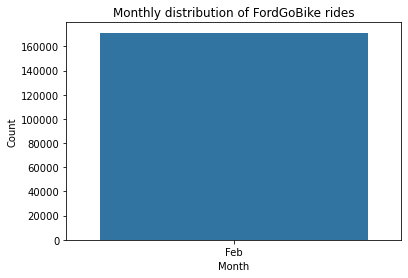

In [51]:
sb.countplot(data = bike_df, x = 'start_time_month', color = plot_color );
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly distribution of FordGoBike rides');

### Observation:

As can be seen from the plot, the data  for the the FordGoBike rides only captures feburary 2019.

### Question 2: What is the difference in distribution of the gender classification with respect to our cleaned dataset and the original dataset?

### Visualization: 

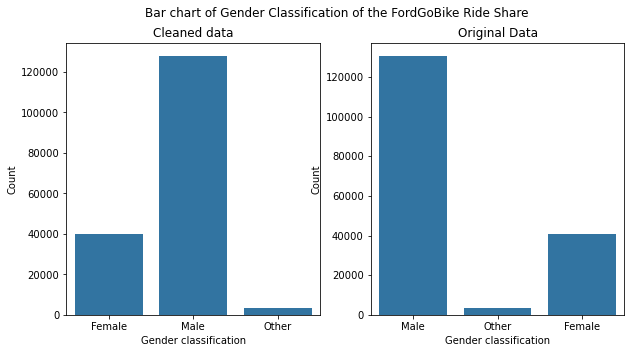

In [52]:
# A bar chart can be used to depict this categorical data type 
# Seaborn countplot is used here

plt.figure(figsize = [10,5])
# Set a title for the whole two plots
plt.suptitle('Bar chart of Gender Classification of the FordGoBike Ride Share')
# Left plot: Cleaned data
plt.subplot(1,2,1)
sb.countplot( data = bike_df, x = 'member_gender', color = plot_color)
plt.xlabel('Gender classification')
plt.ylabel('Count')
plt.title('Cleaned data');

# Right plot: Original data
plt.subplot(1,2,2)
sb.countplot( data = bike_ride, x = 'member_gender', color = plot_color)
plt.xlabel('Gender classification')
plt.ylabel('Count')
plt.title('Original Data');

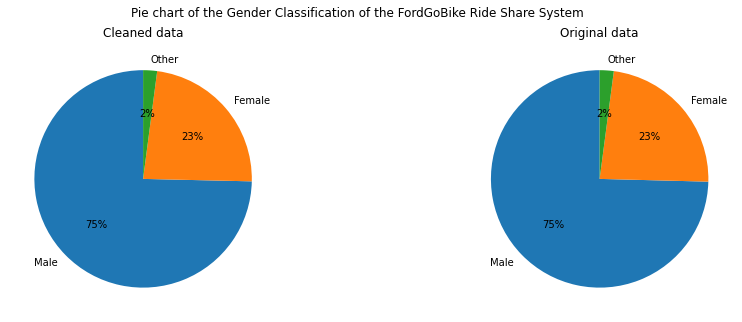

In [53]:
# Using pie chart to show the distribution
# Since it is a categorical datatype with three categories, a pie chart can be used to represent the data

plt.figure(figsize =[15,5])
plt.suptitle('Pie chart of the Gender Classification of the FordGoBike Ride Share System')

# left plot: cleaned data
plt.subplot(1,2,1)
# return the value counts of the variable
data = bike_df['member_gender'].value_counts()
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = True)
plt.title('Cleaned data');

#right plot: original dataset
plt.subplot(1,2,2)
# return the value counts of the variable
data = bike_ride['member_gender'].value_counts()
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = True)
plt.title('Original data');

### Observation: 

From the output of both the bar chart and the pie chart, there is no change before and after cleaning the dataset.
Males make up a 75% of the whole bike usage data.

### Question 3: What is the frequency of usage of FordGoBike bike sharing service by Days of The weak?

### Visualization:

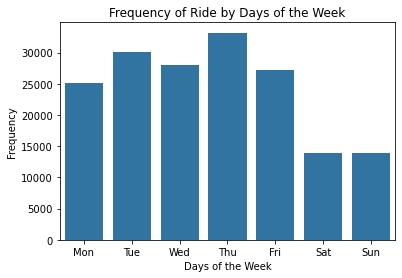

In [54]:
#using seaborn's countplot to visualize the data
dw_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sb.countplot( data = bike_df, x = 'start_time_dw', color = plot_color, order = dw_order);
plt.title('Frequency of Ride by Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Frequency');

### Observation:

There is a stronger use of the service during the weekdays than weekends. This might suggest that most people use the service to commute to work. A break down of its user type will be usefull and more insightful.

### Question 4: How many people use bike share for all trips ?

### Visualization:

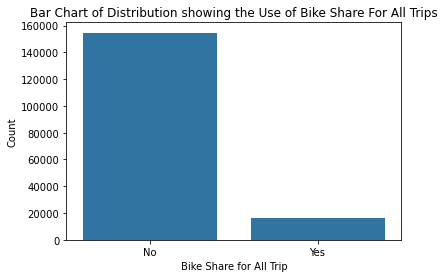

In [55]:
sb.countplot(data= bike_df, x='bike_share_for_all_trip', color= plot_color);
plt.title('Bar Chart of Distribution showing the Use of Bike Share For All Trips')
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

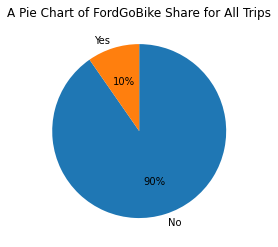

In [56]:
# Lets look at the above distribution in terms of proportions
# using a pie chart

data = bike_df['bike_share_for_all_trip'].value_counts()
plt.pie( data, labels = data.index, autopct = '%0.0f%%', startangle = 90, counterclock = False);
plt.title('A Pie Chart of FordGoBike Share for All Trips');

### Observation: 

From both Visualizations, majority of the users (90%) do not use bike share for all trips.

### Question 5: What is the difference in user type result before and after cleaning the dataset

### Visualization: 

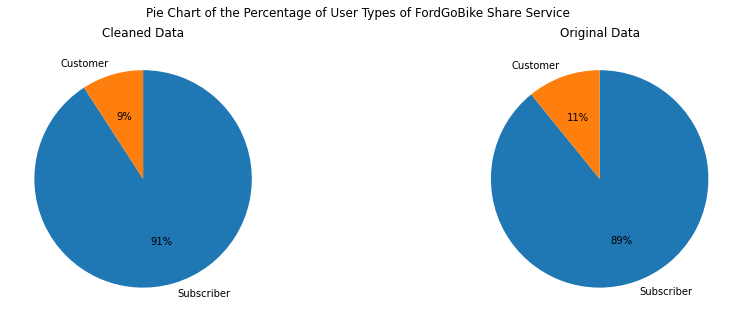

In [57]:
plt.figure(figsize =[15,5])
plt.suptitle('Pie Chart of the Percentage of User Types of FordGoBike Share Service')

# left plot: cleaned data
plt.subplot(1,2,1)
# returns the value count of each user type
data = bike_df['user_type'].value_counts()
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = False)
plt.title('Cleaned Data');

# right plot: original data
plt.subplot(1,2,2)
# returns the value count of each user type
data = bike_ride['user_type'].value_counts()
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = False)
plt.title('Original Data');

### Observation:

From the two pie charts, it shows the after cleaning the dataset, there was an increase in subscribers and a decrease in customers. From the left chart (cleaned data), It shows there are more subscribers than customers (casuals). This is a positive indicator for the bike sharing service.

### Question 6: What is the distribution of distance covered by riders or users of the service?

### Visualization:

In [58]:
bike_df['distance/km'].describe()

count    171303.000000
mean          1.509297
std           1.027008
min           0.020000
25%           0.790000
50%           1.220000
75%           1.960000
max          63.800000
Name: distance/km, dtype: float64

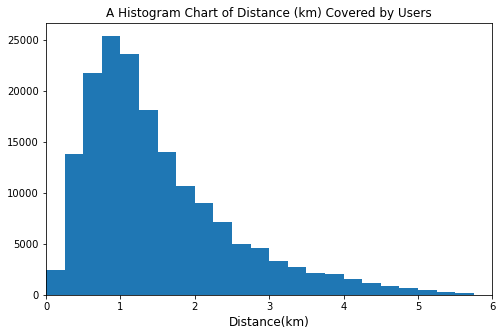

In [59]:
plt.figure(figsize=[8,5])
# this is a quantitative variable so a histogram can be used.
bin_edges = np.arange(0, 6, 0.25)
plt.hist( data = bike_df, x = 'distance/km', bins = bin_edges);
plt.xlabel('Distance(km)', fontsize = 12)
plt.title('A Histogram Chart of Distance (km) Covered by Users')
plt.xlim([0,6]);

### Observation:

The above plot show the distance covered is a unimodal distribution and it is also a positively skewed variable

### Question 7: What is the member age distributed of users of the ride service?

### Visualization:

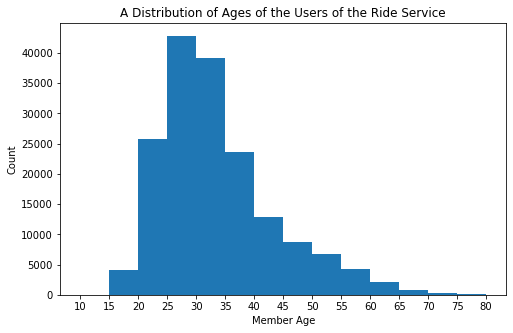

In [60]:
plt.figure(figsize = [8,5])
bin_edges = np.arange(10, bike_df['member_age'].max()+5, 5)
plt.hist(data = bike_df, x = 'member_age', bins = bin_edges);
plt.title('A Distribution of Ages of the Users of the Ride Service')
plt.xticks(bin_edges, bin_edges);
plt.xlabel('Member Age');
plt.ylabel('Count');

### Observation:

The histogram depicts a significant amount of people using the service fall within the ages of 20 - 40 years old. With majority of its users ranging between 25 - 35 years old.

### Distribution(s) of variable(s) of interest and transformations performed:

- In terms of users/riders, there were more male riders than female, and most members were subscribers compared to casual riders. The majority of the members did not use bike share for all of their trips, and most were around 25 to 40 years old

- The dataset definetly required cleaning which affected the result of the analysis. After cleaning some of the visuals changed, for instance, the percentage proportion of subscribers vs customers of the ride sharing service.

- Outliers were spotted using descriptive statistics and also histogram plot. Many transformations were done at the feature engineering stage which enabled a deeper dive into the analysis of the dataset.

### Features investigated, and operations performed on the data:

- A comparison between the cleaned data and original data was made and that showed the effectiveness of the cleaned data and how it affects result of the analysis. 
- Operations were carried out to make the data more suitable for use; changing data types, extracting new data from the existing data, dropping null values, etc.

## Bivariate Exploration

In this section, I will be looking into how subscribers vs customers use the bike sharing service in terms of days of the week, age, gender, ride distance, time duration of rides, etc.

### Question 1: How is user type ride service usage distributed across days of the week?

### Visualization:

In [78]:
# Using a clustered bar chart to answer the above question for ride usage for the user types
# A function to create a bivariate countplot of two categorical variables
def countplot(cat_var1, cat_var2):
    plt.figure(figsize = [8,5]);
    dw_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    sb.countplot(data = bike_df, x = cat_var1, hue = cat_var2, order = dw_order);
    plt.title('User Type Ride Usage by Days of the Week')
    plt.xlabel('Days of Week');
    plt.ylabel('Bike Ride Count');

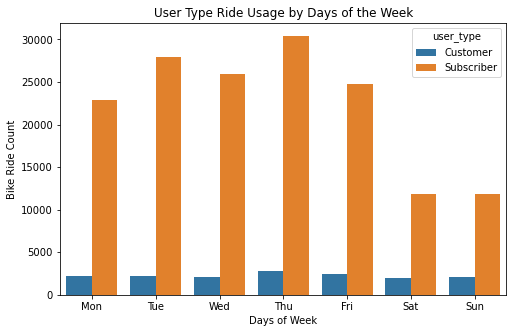

In [79]:
countplot('start_time_dw','user_type')

#### Lets split the above plot into their individual user types and depict them side by side

<Figure size 1080x360 with 0 Axes>

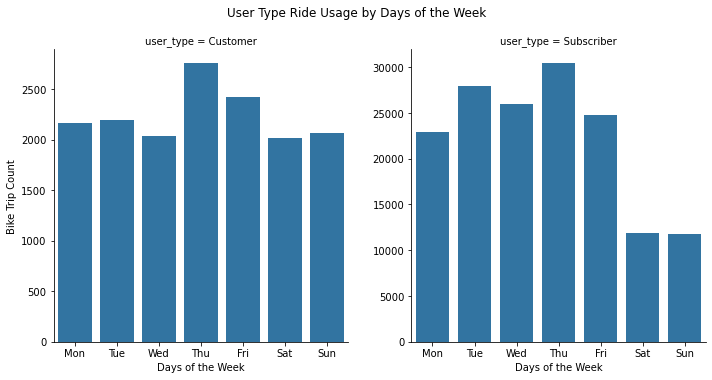

In [62]:
# plot the two user type ride usage bar chart side by side fro more insight
plt.figure(figsize = [15,5]);
dw_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data= bike_df, x='start_time_dw', col="user_type", kind='count',
               sharey = False, order = dw_order, color = plot_color);
g.fig.suptitle('User Type Ride Usage by Days of the Week', y = 1.05)
g.set_axis_labels("Days of the Week", "Bike Trip Count");

### Observation:

- In the first plot (clustered bar chart), there were much more subscriber usage than customers overall. The drop of volume on weekends for subscribers indicates that they may primarily ride bikes for work commute during work days.

- In the second plot, it shows that customers show consistency across the week while subscribers ride mostly during the weekdays with a sharp decline on weekends. Both seem to share the same peak day (Thursday).

### Question 2: Is there a difference in the average speeds travelled by each user type?

### Visualization:

user_type
Customer      8.168300
Subscriber    9.953925
Name: speed_km/hr, dtype: float64


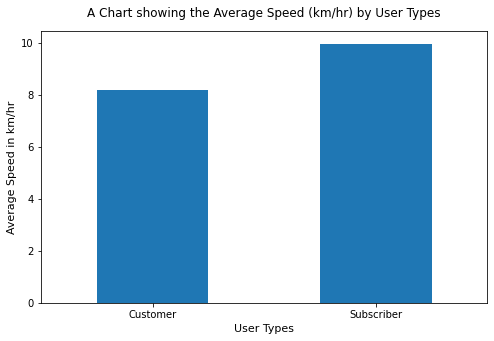

In [63]:
plt.figure(figsize = [8,5])
data = bike_df.groupby('user_type')['speed_km/hr'].mean().plot( kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('User Types', fontsize =11)
plt.ylabel('Average Speed in km/hr', fontsize =11)
plt.title('A Chart showing the Average Speed (km/hr) by User Types', y = 1.03);
print(bike_df.groupby('user_type')['speed_km/hr'].mean());

### Observation:

Since speed and distance are relative, the result above gives more meaning to why subscribers have a lower distance travelled. The data shows that customers ride at a lower speed as comapred to subscribers, why?. Can age group be a factor?

### Question 3: How much of a factor is the age groupings of users with respect to ride speeds ?

#### Specifying the age group classifications
- Young adults - (17-39)
- Middle aged adults- (40 - 59)
- Seniors (60 - 79)

In [64]:
# Create a new column and break down user ages into the different age groups

bike_df.loc[bike_df['member_age'].between(17,39) , 'age_group'] = 'young_adults'
bike_df.loc[bike_df['member_age'].between(40,59), 'age_group'] = 'mid_aged_adults'
bike_df.loc[bike_df['member_age'].between(60,79), 'age_group'] = 'seniors'

In [65]:
bike_df['age_group']

0            young_adults
2         mid_aged_adults
3            young_adults
4         mid_aged_adults
5         mid_aged_adults
               ...       
183407       young_adults
183408       young_adults
183409       young_adults
183410       young_adults
183411       young_adults
Name: age_group, Length: 171303, dtype: object

In [66]:
# Lets get the value count for each of the age groupings with respect to user type
bike_df.groupby('user_type')['age_group'].value_counts()

user_type   age_group      
Customer    young_adults        12751
            mid_aged_adults      2745
            seniors               163
Subscriber  young_adults       122725
            mid_aged_adults     29886
            seniors              3033
Name: age_group, dtype: int64

In [67]:
# Lets look at the percentage proportions of the age groups with respect to customer user type
customer = bike_df[bike_df['user_type'] == 'Customer']
cust_prop = (customer['age_group'].value_counts() / customer['age_group'].count()) * 100
cust_prop

young_adults       81.429210
mid_aged_adults    17.529855
seniors             1.040935
Name: age_group, dtype: float64

In [68]:
# Lets look at the percentage proportions of the age groups with respect to subscriber user type
subscriber = bike_df[bike_df['user_type'] == 'Subscriber']
sub_prop = (subscriber['age_group'].value_counts() / subscriber['age_group'].count()) * 100
sub_prop

young_adults       78.849811
mid_aged_adults    19.201511
seniors             1.948678
Name: age_group, dtype: float64

### Observation: Value counts and Percentage proportions of user type age groupings
- From the output of the value count for both user types with respect to age groups, we see that the age groups in the subscriber user type has more users per age group than the of the customer user type's age groupings.


- With the percentage proportions of each age groupings with respect to each user type, it is observed that young adults in the customer user type has a higher percentage than that of the subscriber user type.

### Visualization:

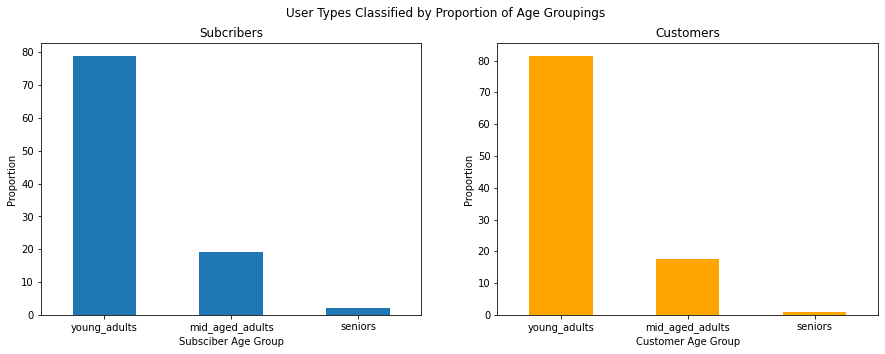

In [69]:
plt.figure(figsize =[15,5])
plt.suptitle('User Types Classified by Proportion of Age Groupings')

# left plot: Subscribers
plt.subplot(1,2,1)
sub_prop.plot(kind='bar');
plt.xlabel('Subsciber Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation = 0)
plt.title('Subcribers');

# right plot: Customers
plt.subplot(1,2,2)
cust_prop.plot(kind='bar', color = 'orange');
plt.xlabel('Customer Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation = 0)
plt.title('Customers');
plt.show()

### Observation:
- This shows that both user type categories(subscriber and customer) are populated with young adults.

###  Question 4: What is the relationship between age of ride users and speed?
- Since the user types have a high percentage of young adults, lets take a look at the relationship between speed and each age groupings.

### Visualization 1:

In [80]:
# Using a point plot to depict the trend in speed with respect to age
def pointplot(num_var1, num_var2):
    plt.figure(figsize=(15,9))
    sb.pointplot(data = bike_df, x = num_var1, y = num_var2, scale = .5, errwidth = 0.5, color = plot_color)
    plt.title('Member Age vs Speed_km/hr', fontsize=15)
    plt.xlabel('Age in Years')
    plt.ylabel('Speed in km/hr')
    plt.xticks(rotation = 90);

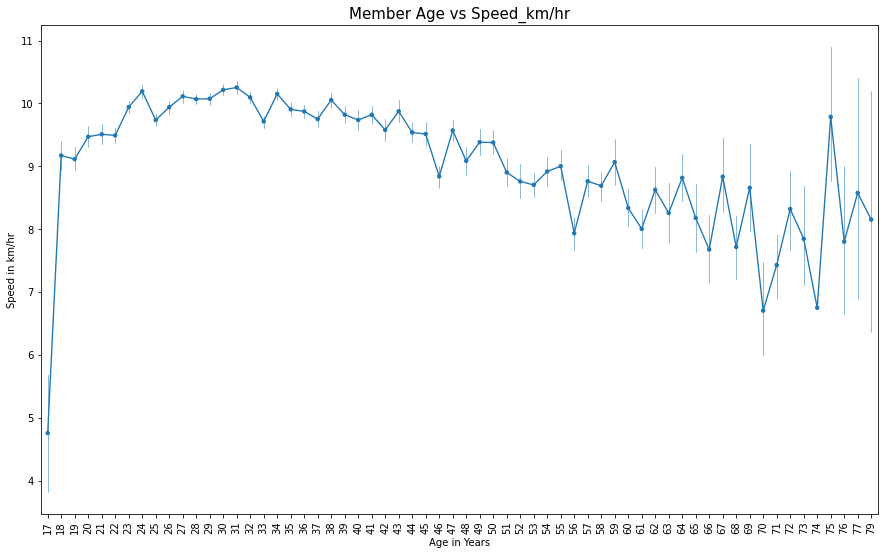

In [81]:
pointplot('member_age', 'speed_km/hr')

### Observation 1:
- The point plot chart above shows that young adults have an higher average speed.
- Speed drops as it approaches the middle_aged_adults.
- Senior riders have a higher speed fluctuation with the lowest speed recorded within that age group.

### Visualization 2:

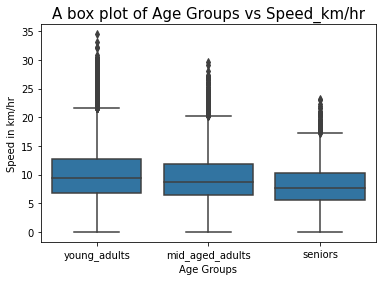

In [71]:
# Using a box plot to depict the age groups
sb.boxplot(data = bike_df, x = 'age_group', y = 'speed_km/hr', color = plot_color);
plt.title('A box plot of Age Groups vs Speed_km/hr', fontsize=15)
plt.xlabel('Age Groups')
plt.ylabel('Speed in km/hr')
plt.xticks(rotation = 0 );

### Observation 2: 
- From the box plot above it shows that as age increases, average speed reduces.

- This was drilled down because I was interested in customer's lower speed. From the plot above, age class had negligible effect on customer speed as most customers were young adults who move at faster speeds than that of other age groups.

### Section Observation:
Customers were shown to use the service more than Subscribers on weekends while subscribers showed a more consistent usage of the service on weekdays. That might be a result of subscribers using the service as a means of commuting to work. It is not surprising to see that the average distance covered by subscribers was lower than customers.

Speed and Distance: The increase in avearge speed with respect to subscribers can also be as a result they trying to get to work on time, which also relates to the drop in distance covered. Meanwhile customers have higher distance hence a slower speed.

Also there was an interest in developing age groups to see how that relates to speed and the findings about it were as expected. Generally one would expect that as age increases, average speed also reduces and this was shown in the box plot.

## Multivariate Exploration

Here, plots of three or more variables are created to investigate the previously explored data even further and gain more insight.

### Question 1: What is the effect of Distance and Speed on Age group, what relationship exist between the three?

### Visualization:

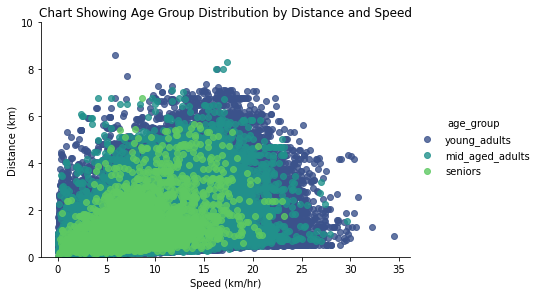

In [72]:
# Plotting of a regplot to show the relationship between distance, speed and age groups

g = sb.FacetGrid(data = bike_df, hue = 'age_group', height = 4, aspect = 1.5, palette = 'viridis');
g = g.map(sb.regplot,'speed_km/hr','distance/km', x_jitter = 0.04, fit_reg = False);
g.add_legend()         
plt.xlabel('Speed (km/hr)')
plt.ylabel('Distance (km)')
# Set ylim to zoom in on high concentration of data points
plt.ylim(0,10);
plt.title('Chart Showing Age Group Distribution by Distance and Speed');

### Observation
The plot above shows what was confirmed about speed earlier in the analysis. As age increases speed decreases (majority of the seniors speed data points were within 4km/hr and 20 km/hr.
Young adults cover the most distance with the highest speed. The data points in the plot show the distribution of age groups with respect to distance and speed.

### Question 2: Which gender within the two user types uses the ride service more across days of the week?

### Visualization

We will use a clustered bar plot to depict this relationship between gender, user type and day of week

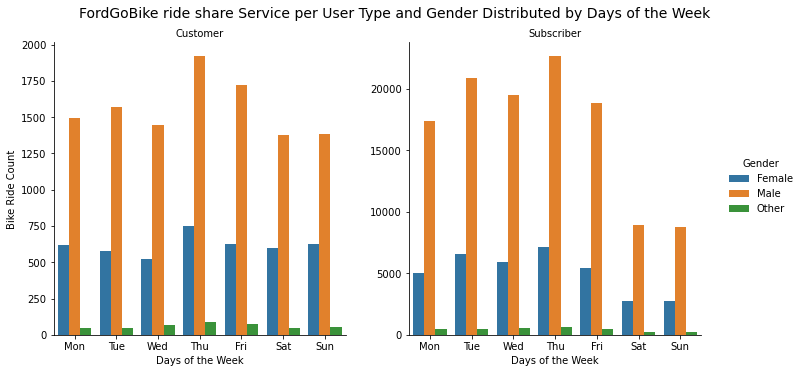

In [73]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data = bike_df, x ='start_time_dw', col = "user_type", hue = 'member_gender', kind = 'count', sharey = False,
                order = weekdays)
g.set_axis_labels("Days of the Week", "Bike Ride Count")
g._legend.set_title('Gender')
g.set_titles('{col_name}')
g.fig.suptitle('FordGoBike ride share Service per User Type and Gender Distributed by Days of the Week', y=1.03, fontsize=14);

### Observation
From the plot above, males generally use the service more than any other gender. The plots have showen how individual genders contribute to rides on different days of the week. All genders whether they are customers or subscribers, use this service the most on Thursdays than any other day.
There is a general number of ride decline across gender on weekends for subscribers. This has been proven earlier but now I get to see what gender contributed largely to this decline.

### Relationships observed in this part of the investigation and features that strengthened each other:

Age groups in the different user types made it visible on the scatter plot areas where different age groups were highly concentrated with respect to their distance covered and speed.

### Interesting or surprising interactions between features:

>Well there weren't any surprising interactions between features. Instead the interactions between the features strengthened and gave deeper insights into previously explored visualizations.

## Conclusions

### Summary of main findings and steps taken during data exploration

In the data exploration stage of my analysis, univariate visualizations helped me understand of my dataset and how clean vs dirty data affects data analysis result.

The bivariate visualizations of features in the dataset helped in exploring the relationships between features. Both univariate and bivariate also exposed outliers in the dataset.

Multivariate visualizations gave deeper insights and solidified the results gotten from our bivariate exploration of the dataset.

__In terms of findings:__
- Days of the week: Subscribers used the ride service consistently on weekdays with a sharp decline on weekends whereas Customers saw a consistent usage across the week. They both have a similar peak day, Thursday.

- Age groups: The dataset is mostly made up of young adults, meaning that younger people used the ride service the most for the month of Feburary.

- Speed & Distance: These are two relative variables. Subscribers saw an increase in speed with a decrease in distance covered while this was vice versa for customers. Also as age of users increased the speed and distance covered decreased.

__For Steps taken:__
- Creating age groups was the easiest way to classify a large group of data set into categories. This enabled an easier use of a quantitative variable as if it were a qualitative variable.

__Worth Noting:__ Age group data points showed the concentration of its different age class with respect to speed and distance. This further strenghtens the point on speed and distance.

Finally it was expected that subscribers would have longer ride times and distances covered compared to customers since they had shown a strong commitment to the continuous usage of the ride service but this was not true. The result was in fact the oppposite of my assertions.

In [74]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171303 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171303 non-null  int64         
 1   start_time               171303 non-null  datetime64[ns]
 2   end_time                 171303 non-null  datetime64[ns]
 3   start_station_name       171303 non-null  object        
 4   start_station_latitude   171303 non-null  float64       
 5   start_station_longitude  171303 non-null  float64       
 6   end_station_name         171303 non-null  object        
 7   end_station_latitude     171303 non-null  float64       
 8   end_station_longitude    171303 non-null  float64       
 9   bike_id                  171303 non-null  int64         
 10  user_type                171303 non-null  category      
 11  member_birth_year        171303 non-null  int64         
 12  member_gender   

In [75]:
# Save cleaned dataset used in our analysis in a csv file
bike_df.to_csv('clean_201902_fordgobike_tripdata.csv')